<a href="https://colab.research.google.com/github/Nikita1kum/Main/blob/main/MBTI_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn tensorflow numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random

In [ ]:
def generate_random_data(num_samples):
    mbti_types = ['INTJ', 'ENFP', 'INTP', 'ENTJ', 'INFJ', 'ENFJ', 'INFP', 'ENTP']
    preferences = ['cat', 'dog']

    random_data = []
    for _ in range(num_samples):
        mbti_type = random.choice(mbti_types)
        image_result = random.choice(preferences)
        random_data.append((mbti_type, image_result))

    return random_data


In [ ]:
random_data = generate_random_data(5)
mbti_traits_df = pd.DataFrame(random_data, columns=['mbti', 'img_result'])
print(mbti_traits_df.head())

   mbti img_result
0  ENFJ        dog
1  INFP        dog
2  INFJ        cat
3  ENTP        dog
4  INTP        dog


In [ ]:
label_encoder = LabelEncoder()
mbti_types = mbti_traits_df['mbti'].unique()
mbti_dict = {mbti: idx for idx, mbti in enumerate(mbti_types)}
mbti_traits_df['mbti_encoded'] = mbti_traits_df['mbti'].map(mbti_dict)

In [ ]:
print("MBTI Dictionary:", mbti_dict)
print("Unique MBTI Types in DataFrame:", df['mbti'].unique())

MBTI Dictionary: {'ENFJ': 0, 'INFP': 1, 'INFJ': 2, 'ENTP': 3, 'INTP': 4}
Unique MBTI Types in DataFrame: [0 1 2 3 4 5 6 7]


In [ ]:
# Initialize and train the logistic regression model
X = mbti_traits_df['mbti_encoded'].values.reshape(-1, 1)
y = label_encoder.fit_transform(mbti_traits_df['img_result'])
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
print(df.head())
print(f"Total records: {len(df)}")

   mbti  preference
0     0           0
1     1           1
2     2           0
3     3           1
4     4           0
Total records: 8


In [ ]:
y_pred = mbti_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"MBTI Model accuracy: {accuracy * 100:.2f}%")

MBTI Model accuracy: 0.00%


In [ ]:
# Function to predict MBTI preference
def predict_mbti_preference(mbti_type):
    if mbti_type not in mbti_dict:
        raise ValueError(f"MBTI type '{mbti_type}' not found in the training data.")
    mbti_encoded = mbti_dict[mbti_type]
    prediction = model.predict([[mbti_encoded]])
    preference = label_encoder.inverse_transform(prediction)
    return preference[0]


In [ ]:
base_dir = '/content/dogs_vs_cats'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)


Found 20000 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)



Found 5000 images belonging to 2 classes.


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:


# Normalise
def process(image,label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding ='valid' , activation='relu', input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides= 2,padding ='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding ='valid' , activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides= 2,padding ='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding ='valid' , activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides= 2,padding ='valid'))

# model.add(Flatten())

# model.add(Dense(128, activation ='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation ='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1, activation ='sigmoid'))

In [ ]:
# Build the model
image_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
image_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
image_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = image_model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_ds,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5732 - accuracy: 0.7053 - val_loss: 0.5567 - val_accuracy: 0.7219
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5448 - accuracy: 0.7219 - val_loss: 0.5434 - val_accuracy: 0.7375
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5312 - accuracy: 0.7381 - val_loss: 0.5239 - val_accuracy: 0.7400
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5322 - accuracy: 0.7303 - val_loss: 0.5455 - val_accuracy: 0.7100
Epoch 5/30
100/100 [==============================] - 10s 96ms/step - loss: 0.5163 - accuracy: 0.7425 - val_loss: 0.5054 - val_accuracy: 0.7556
Epoch 6/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5125 - accuracy: 0.7378 - val_loss: 0.4952 - val_accuracy: 0.7688
Epoch 7/30
 25/100 [======>.......................] - ETA: 1s - loss: 0.5174 - accuracy: 0.7437

100/100 [==============================] - 3s 32ms/step - loss: 0.5174 - accuracy: 0.7437 - val_loss: 0.5014 - val_accuracy: 0.7550


In [ ]:
# Evaluate the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

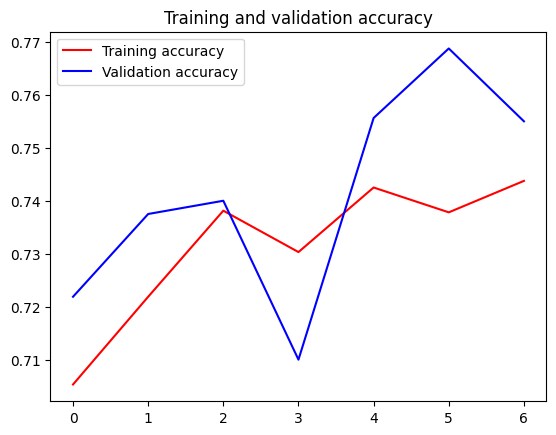

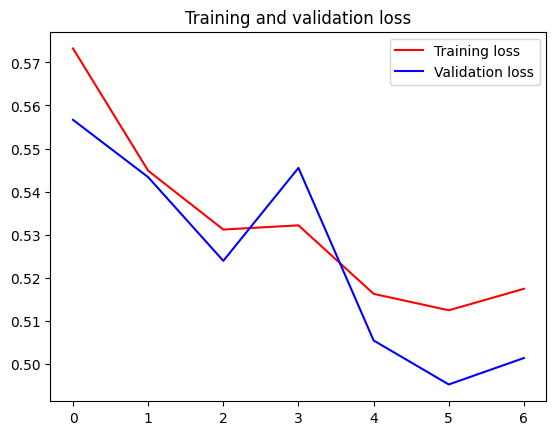

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Function to predict from an image
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Resize image to 150x150 pixels
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Add batch dimension
    img_tensor /= 255.  # Normalize the image

    prediction = image_model.predict(img_tensor)
    return 'dog' if prediction[0] > 0.5 else 'cat'

In [ ]:
# Function to randomly choose an image based on MBTI prediction
def choose_image(mbti_type, cat_dir, dog_dir):
    mbti_preference = predict_mbti_preference(mbti_type)

    if mbti_preference == 'cat':
        image_folder = cat_dir
    else:
        image_folder = dog_dir
    # Randomly choose an image from the selected folder
    image_name = random.choice(os.listdir(image_folder))
    image_path = os.path.join(image_folder, image_name)

    return image_path, mbti_preference

In [ ]:
# Set up directories for cat and dog images (adjust these paths according to your dataset)
cat_dir = os.path.join(base_dir, '/content/dogs_vs_cats/train/cats')
dog_dir = os.path.join(base_dir, '/content/dogs_vs_cats/train/dogs')

# Example combined prediction
mbti_type = random_data[0][0]
chosen_image_path, predicted_preference = choose_image(mbti_type, cat_dir, dog_dir)

1/1 [==============================] - 0s 19ms/step
The chosen image is predicted to be a dog.


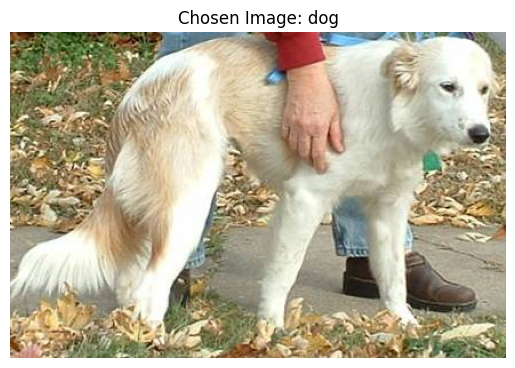

In [ ]:

# Predict the image
image_result = predict_image(chosen_image_path)
print(f"The chosen image is predicted to be a {image_result}.")
# plt.imshow(predict_image(chosen_image_path))

# Display the chosen image
img = image.load_img(chosen_image_path)
plt.imshow(img)
plt.title(f"Chosen Image: {image_result}")
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
print(f"MBTI type: {mbti_type}")
print(f"Predicted preference: {predicted_preference}")
print(f"Chosen image path: {chosen_image_path}")


MBTI type: ENFJ
Predicted preference: dog
Chosen image path: /content/dogs_vs_cats/train/dogs/dog.10069.jpg
